In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from scipy import integrate
import seaborn as sns

plt.rcParams['figure.dpi'] = 300

In [20]:
directory = 'D:\\RST\\notebook\\GE\\GE Combined Random'

In [21]:
directory = '/Volumes/Data2/RST/notebook/GE/GE Combined Random'

In [22]:
df_list = []
for file in os.listdir(directory):
    df_list.append(pd.read_csv(directory + '/' + file))
    
ge_df = pd.concat(df_list)

In [23]:
baseline = ge_df[ge_df['iteration'] == 0][['period', 'group', 'ge_single']]
baseline = baseline.rename(columns = {'ge_single':'baseline'})
baseline.head(10)

,period,group,baseline
0,AM,bl,0.021395
1,AM,c0,0.024148
2,AM,imm,0.021772
3,AM,lep,0.021077
4,AM,lico,0.022466
5,AM,rac,0.021324
6,AM,raw,0.021848
0,EM,bl,0.012942
1,EM,c0,0.013753
2,EM,imm,0.012397


In [24]:
ge_df = ge_df.merge(baseline)
ge_df['ge'] = ge_df['ge_single']/ge_df['baseline'] * 100 
ge_df

,iteration,period,group,ge_single,baseline,ge
0,0,AM,bl,0.021395,0.021395,100.000000
1,1,AM,bl,0.021276,0.021395,99.446217
2,2,AM,bl,0.021166,0.021395,98.931701
3,3,AM,bl,0.021032,0.021395,98.304527
4,4,AM,bl,0.020833,0.021395,97.372042
...,...,...,...,...,...,...
5658,190,PM,raw,0.006457,0.022923,28.166839
5659,191,PM,raw,0.006449,0.022923,28.130874
5660,192,PM,raw,0.006379,0.022923,27.829493
5661,193,PM,raw,0.006375,0.022923,27.808309


In [25]:
group_list = ['lico', 'c0', 'lep', 'imm', 'rac', 'bl', 'raw']

In [26]:
group_df = pd.DataFrame.from_records([['Racialized', 'rac'],
 ['Black', 'bl'],
[ 'Recent\nImmigrants', 'imm'],
 ['Low\nIncome', 'lico'],
[ 'Carless\nHouseholds', 'c0'],
[ 'LEP', 'lep'],
[ 'General\nPopulation', 'raw']], columns = ['Group String', 'group'])

In [27]:
group_string_list = list(group_df['Group String'])

In [28]:
group_string_list 

['Racialized',
 'Black',
 'Recent\nImmigrants',
 'Low\nIncome',
 'Carless\nHouseholds',
 'LEP',
 'General\nPopulation']

In [29]:
ge_df = ge_df.merge(group_df)

In [30]:
edge_counter = []
edge = 0
for i in range(500): #500 is the max iteration we probably will calculate to
    
    if i == 0:
        pass
    else:
        edge = edge + 50
    
    edge_counter.append([i, edge])
    
edge_counter_df = pd.DataFrame.from_records(edge_counter, columns = ['iteration', 'edges_removed'])

In [31]:
ge_df = ge_df.merge(edge_counter_df)

/var/folders/zw/x46df3ms6r5391lyb_y98z600000gn/T/ipykernel_15319/440693840.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels([3600,3800,4000,4200,4400,4600], fontsize = 8)


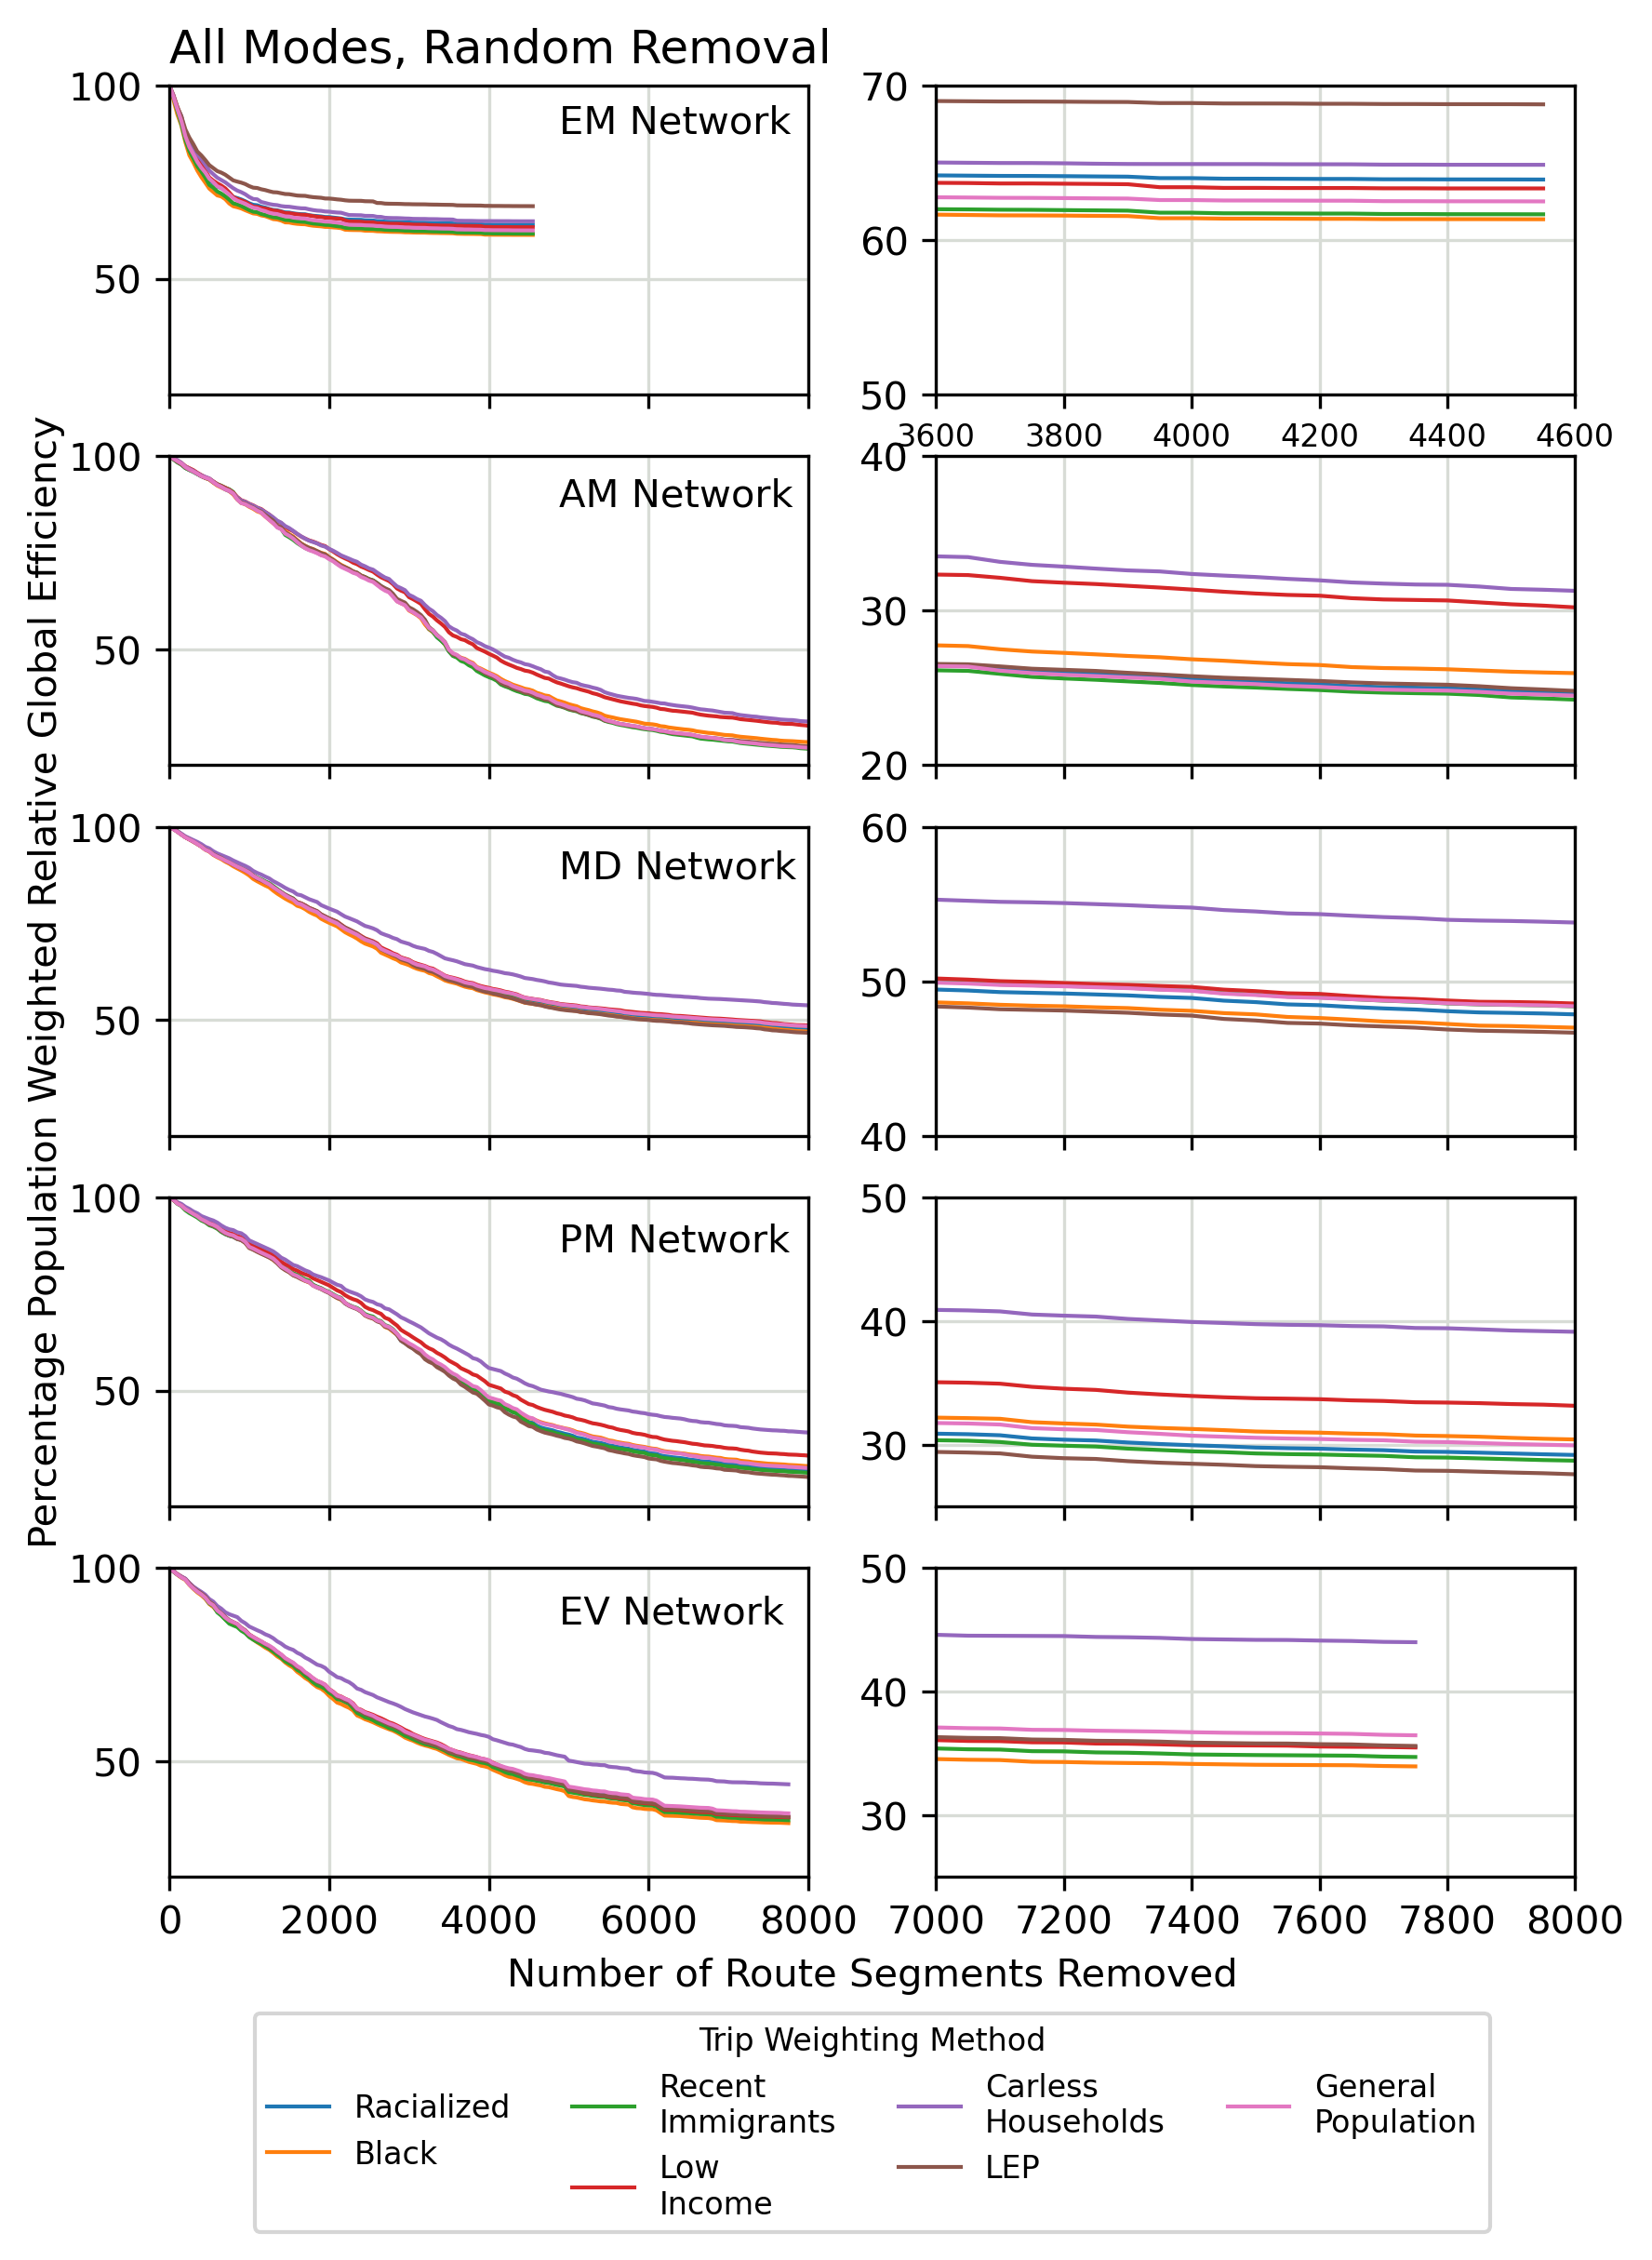

In [37]:
fig, ax = plt.subplots(5,2)

i = 0
y_str = 0.86

period_list = ['EM','AM','MD','PM','EV']

for period in period_list:
    
    df_sub = ge_df[ge_df['period'] == period]
    
    for group in group_string_list:
        
        df_sub_group = df_sub[df_sub['Group String'] == group]
        
        ax[i,0].plot(df_sub_group['edges_removed'], df_sub_group['ge'], label = group, linewidth = 1)
        ax[i,1].plot(df_sub_group['edges_removed'], df_sub_group['ge'], label = group, linewidth = 1)
    
    ax[i,0].set_xlim([0,8000])
    
    ax[i,0].set_ylim([20,100])
    ax[i,0].set_xticks([0,2000,4000,6000,8000])


    
    ax[i,0].set_xticklabels('')
    
    if i in [1,2,3]:
        ax[i,1].set_xlim([7000,8000])
        ax[i,1].set_xticklabels('')
        
    if i == 0:
        ax[0,1].set_xlim([3600,4600])
        ax[0,1].set_xticklabels([3600,3800,4000,4200,4400,4600], fontsize = 8)
        
    fig.text(s = period + ' Network', x = 0.34, y = y_str)
#     fig.text(s = period + ' Network', x = 0.75, y = y_str)


    ax[i,0].grid(color = 'xkcd:light grey')
    ax[i,1].grid(color = 'xkcd:light grey')
    
    
    
    i = i + 1
    y_str = y_str - 0.157
    
ax[4,0].set_xlim([0,8000])
ax[4,1].set_xlim([7000,8000])



ax[0,1].set_ylim([50,70])
ax[1,1].set_ylim([20,40])
ax[2,1].set_ylim([40,60])
ax[3,1].set_ylim([25,50])
ax[4,1].set_ylim([25,50])


ax[4,0].set_xticks([0,2000,4000,6000,8000])
ax[4,0].set_xticklabels([0,2000,4000,6000,8000])

fig.add_subplot(111, frameon=False)

ax[4,1].legend(title = 'Trip Weighting Method', title_fontsize = 8, fontsize = 8, ncol = 4,
          loc='lower center', bbox_to_anchor=(-0.1, -1.2))

plt.xlabel('Number of Route Segments Removed')
plt.ylabel('Percentage Population Weighted Relative Global Efficiency')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title('All Modes, Random Removal', ha = 'left', x = 0)

fig.set_size_inches(6.5,8.5)

plt.savefig('RGE-Random_Graph.png', dpi = 300, bbox_inches = "tight")

In [33]:
milestones = [1000,2000,3000,4000,6000,8000]

In [34]:
heatmap = []
for i in range(len(milestones)):

    temp = ge_df[ge_df['edges_removed'] < milestones[i]]
    
    if i > 0:
        temp = temp[temp['edges_removed'] >= milestones[i-1]]
        
    integrated = pd.DataFrame(temp.groupby(['period', 'Group String']).apply(
        lambda g: integrate.trapz(g['ge'], x=g['edges_removed'])), columns = ['ge']).reset_index()
    denom = temp['edges_removed'].max() - temp['edges_removed'].min()
    integrated['ge'] = integrated['ge']/denom
    
    integrated['edges_removed'] = milestones[i]
    heatmap.append(integrated)
    
heat_all = pd.concat(heatmap)



In [35]:
heat_all = pd.concat(heatmap)

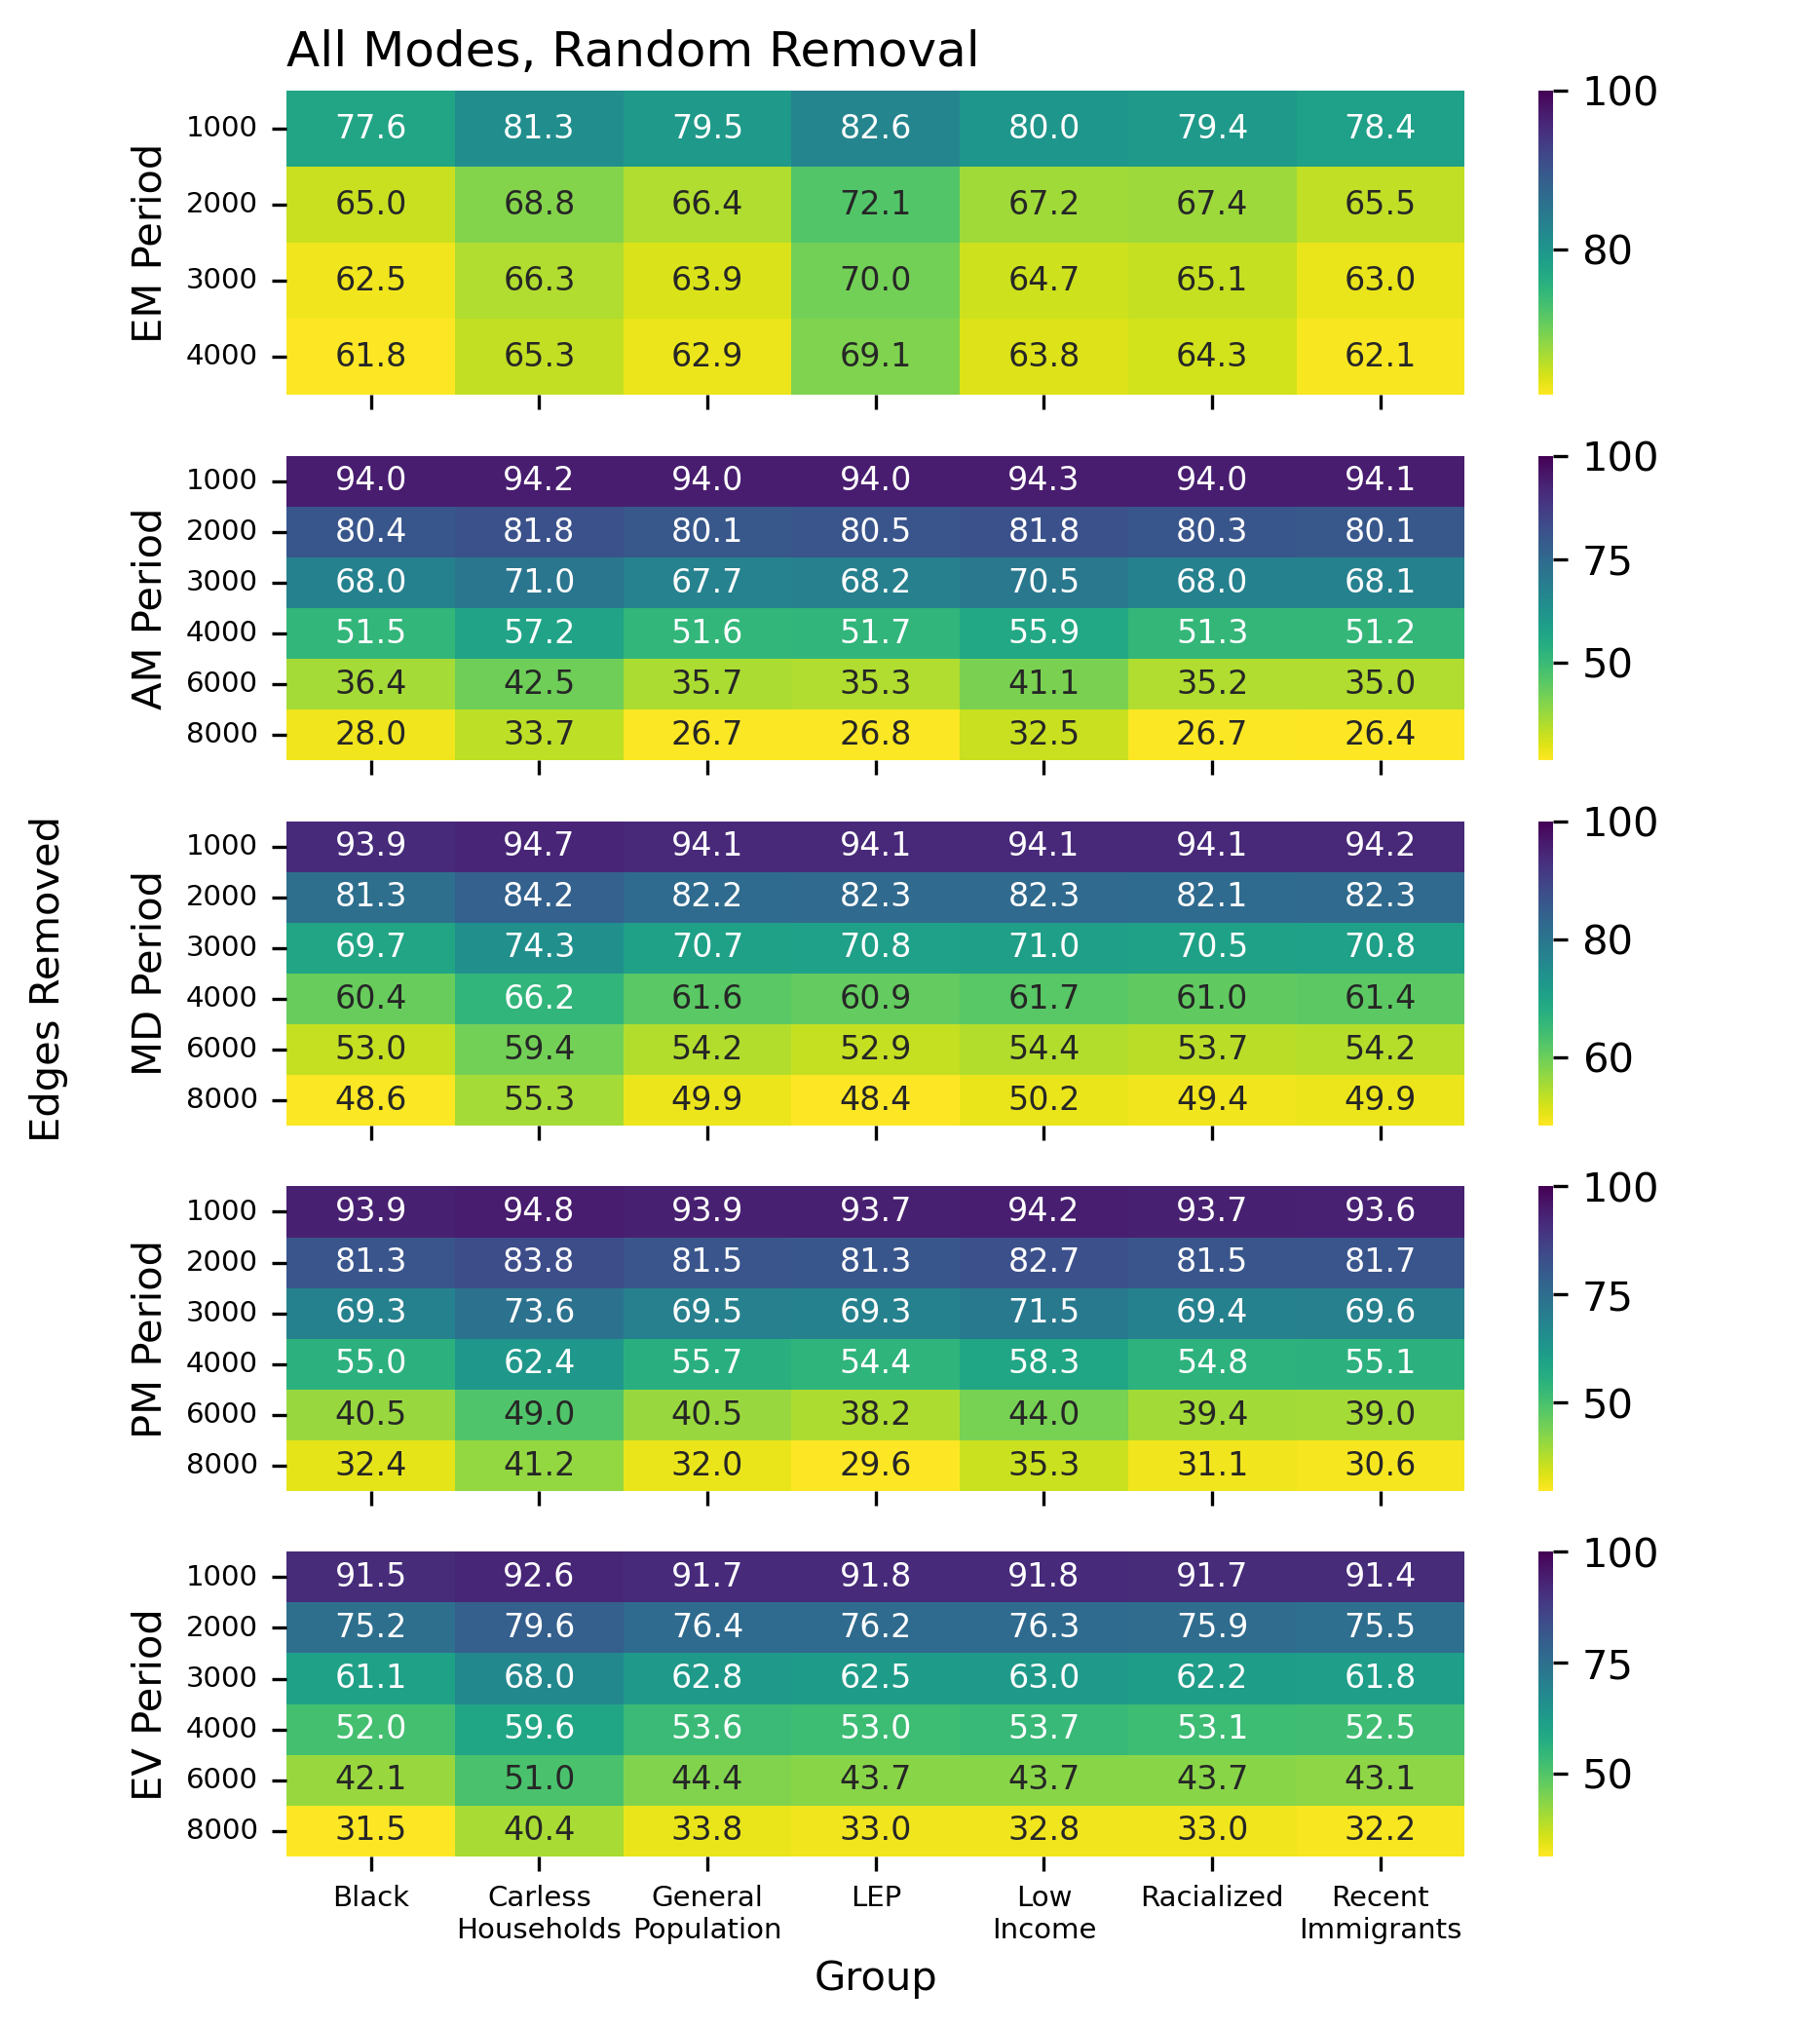

In [36]:
fig, ax = plt.subplots(5,1)

fig.set_size_inches([6.5,8])

i = 0

for period in period_list:

    temp_pivot = heat_all[heat_all['period'] == period]
    
        
    if period == 'EM':
        temp_pivot = temp_pivot[temp_pivot['edges_removed'] <= 4000]
        
    temp_pivot = temp_pivot.pivot('edges_removed','Group String', 'ge')

    sns.heatmap(temp_pivot, ax = ax[i], cmap = 'viridis_r', annot=True, fmt = '.1f', 
                vmin = temp_pivot.min().min(), vmax = 100, annot_kws={"fontsize":8})
    
    ax[i].tick_params(axis='y', rotation=0)
    ax[i].tick_params(axis='x', rotation=0)
    ax[i].set_ylabel(period + ' Period')
    ax[i].set_yticks([i + 0.5 for i in range(len(temp_pivot))])
    ax[i].set_yticklabels(temp_pivot.index, fontsize = 7)
    
    if i == 4:
        ax[i].set_xticklabels(ax[i].get_xmajorticklabels(), fontsize = 7)
        ax[i].set_xlabel('Group')
    else:
        ax[i].set_xticklabels('')
        ax[i].set_xlabel('')



#     ax[i].set_xlabel('Group')
#     ax[i].set_ylabel('Edges Removed')
    
    i = i + 1
fig.text(0.01, 0.5, 'Edges Removed', ha='right', va='center', rotation = 90)
#fig.text(0.5, 0.08, 'Group', ha='center', va='center')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title('All Modes, Random Removal', x = 0, ha = 'left')



plt.savefig('RGE-Random_Heatmap.png', dpi = 300, bbox_inches = "tight")